# Remote control and recording of Keithley 2450 Source Meter

## Imports

In [1]:
import pyKeithleyCtl as RC
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import pandas as pd

from datetime import datetime

## Settings

In [2]:
Keithley_IP = "169.254.127.39"
BiasHV = -4.2 #in Volt
maxCurrent = 0.001 #in Ampere
fileName="test"

now=datetime.now()
timestamp = now.strftime("%y-%m-%d_%H-%M-%S")
print("Timestamp:", timestamp)

Timestamp: 22-04-01_17-15-22


## Connect and set up

In [3]:
PS = RC.KeithleySupply(Keithley_IP)
PS.clear()
PS.reset()

PS.set_voltage(BiasHV)
PS.set_ocp(maxCurrent)

print("Source Meter Info")
print("Identification:", PS.IDN)
print("Our access level:", PS.ask(":SYSTEM:ACCESS?") )

Source Meter Info
Identification: KEITHLEY INSTRUMENTS,MODEL 2450,04418791,1.6.7c
Our access level: FULL


## Dump information

Use this to get a current reading of the set and actual voltage and current. **Do not call while a measurement is being taken!**

In [6]:
print("Set voltage:     ", PS.get_voltage(), "V")
print("Measured voltage:", PS.measure_voltage(), "V")
print("Max current:     ", PS.get_ocp(), "A")
print("Measured current:", PS.measure_current(), "A")

Set voltage:      -4.2 V
Measured voltage: -4.199991E+00 V
Max current:      0.001 A
Measured current: -1.363682E-12 A


## Power up

In [5]:
PS.enable_output()

13

## Start measurements

Measured current is saved in internal buffer. **Do not execute any other cells while the measurements are being taken.** 

In [7]:
PS.start_measurement()

## Stop measurements

**Call this one first after the cell above.** Stops active measurement, transfers buffer over to laptop, and saves data to file.

In [8]:
data, nRow = PS.stop_measurement()

42


In [9]:
raw_output_name = f"{fileName}_raw_{timestamp}.txt"
text_file = open(raw_output_name, "w")
text_file.write(data)
text_file.close()
print(f"Received {nRow} measurements. Saving to {raw_output_name}.")

Received 42 measurements. Saving to test_raw_22-04-01_17-15-22.txt.


## Power down

In [10]:
PS.disable_output()

14

## Plot and save results

Text(0, 0.5, 'Current [A]')

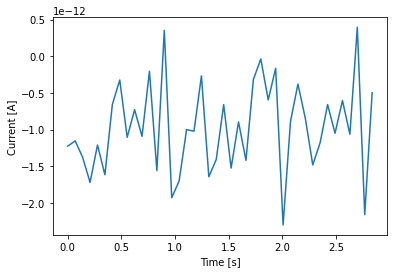

In [14]:
results = PS.to_csv(data, nRow)
csv_output_name = f"{fileName}_table_{timestamp}.csv"
results.to_csv(csv_output_name)
plt.plot(results.REL, results.READ)
plt.xlabel("Time [s]")
plt.ylabel("Current [A]")

## Close connection

In [15]:
PS.close()